In [1]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '.')))

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import pickle, datetime

from analyzer import Analyzer

In [2]:
# anlzr = Analyzer()
anlzr = pickle.load(open("./objects/2020-04-01-23-35.txt", "rb"))

In [3]:
anlzr.videos()

In [38]:
MIDLINE_PATH = "~/Documents/hydracv/hydracv/data/midline/"
MIDLINE_PREFIX = "lengths_"

In [53]:
VIDEONAME = anlzr._video_names()

# Create midline length paths
FILEPATH = []
for video in VIDEONAME:
    path = MIDLINE_PATH + MIDLINE_PREFIX + video.split('.')[0] + '.csv'
    FILEPATH.append(path)

In [69]:
FILEPATH

['~/Documents/hydracv/hydracv/data/midline/lengths_Control-EGCaMP_exp1_a1_30x10fps_5%.csv',
 '~/Documents/hydracv/hydracv/data/midline/lengths_EGCaMP_ctrl_30mins_40x_10fps_mv1.csv',
 '~/Documents/hydracv/hydracv/data/midline/lengths_Control-EGCaMP_exp1_a2_25x10fps_30mins.csv',
 '~/Documents/hydracv/hydracv/data/midline/lengths_EndoRCaMP_ctrl_30mins_35x_10fps_35%intensity_mv3.csv',
 '~/Documents/hydracv/hydracv/data/midline/lengths_EndoRCaMP_ctrl_30mins_35x_10fps_79%intensity_mv6.csv',
 '~/Documents/hydracv/hydracv/data/midline/lengths_Pre_Bisect_40x_4fps_ex4.csv']

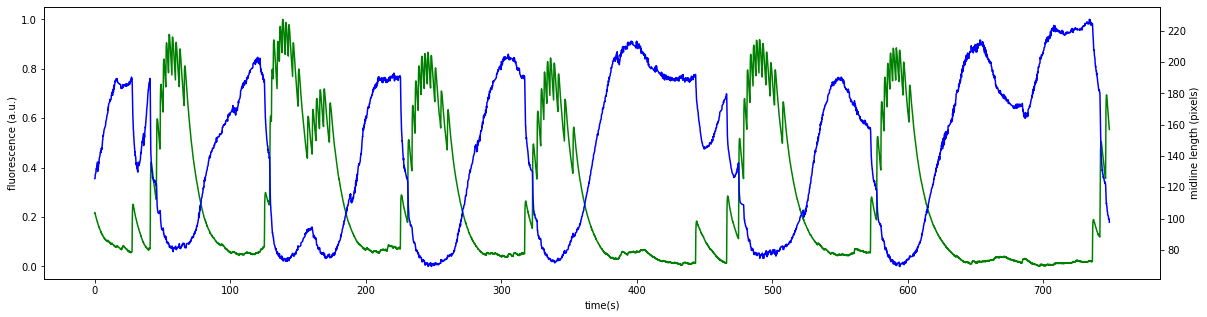

In [63]:
anlzr.add_midline_lens(VIDEONAME[0], FILEPATH[0])
anlzr.plot_fluos_and_midline_lens(VIDEONAME[0])

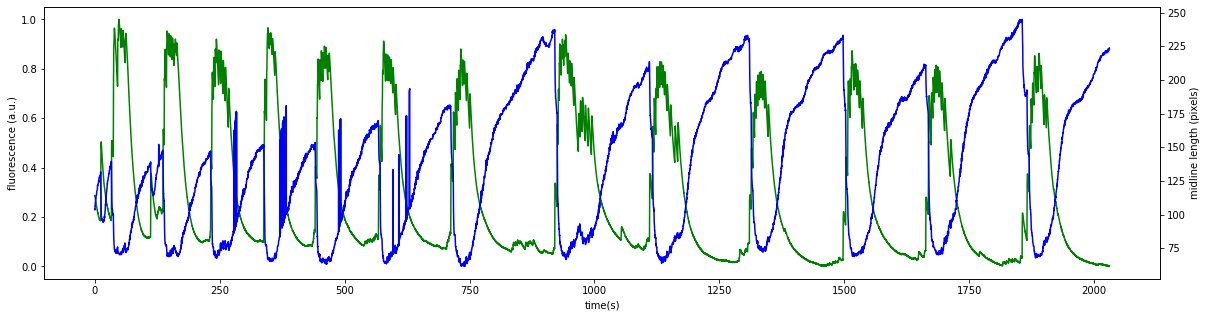

In [64]:
anlzr.add_midline_lens(VIDEONAME[2], FILEPATH[2])
anlzr.plot_fluos_and_midline_lens(VIDEONAME[2])

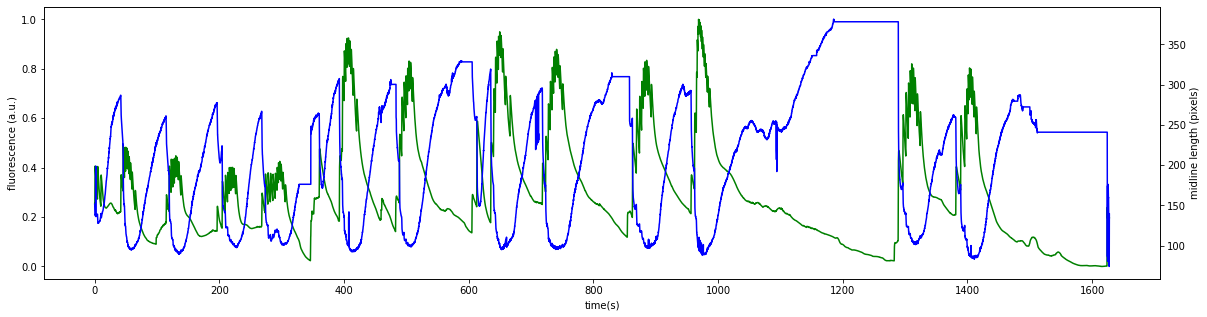

In [66]:
anlzr.add_midline_lens(VIDEONAME[4], FILEPATH[4])
anlzr.plot_fluos_and_midline_lens(VIDEONAME[4])

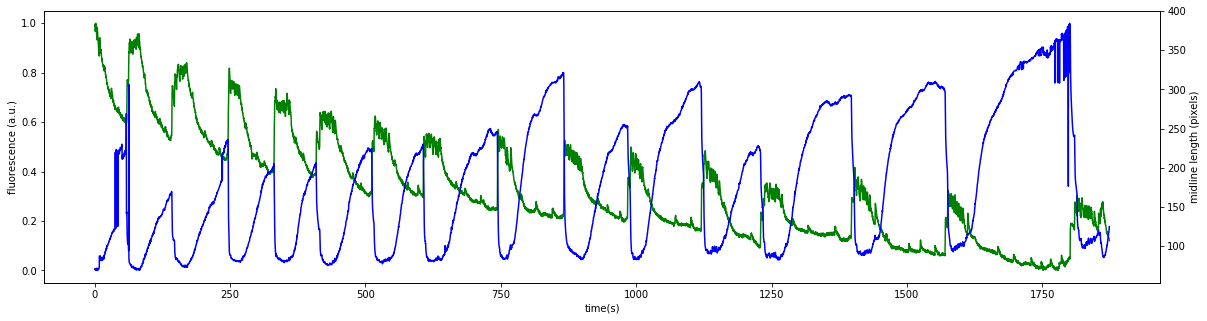

In [71]:
anlzr.add_midline_lens(VIDEONAME[5], FILEPATH[5])
anlzr.plot_fluos_and_midline_lens(VIDEONAME[5])

In [1]:
from find_midline import load_marker

In [2]:
markers = load_marker("data/marker/EGCaMP_ctrl_30mins_20x_10fps_mv1DLC_resnet50_EGCaMP_ctrl_30mins_20x_10fps_mv1May11shuffle1_216000.csv")

In [6]:
markers

,hypostome_x,hypostome_y,hypostome_likelihood,armpit1_x,armpit1_y,armpit1_likelihood,armpit2_x,armpit2_y,armpit2_likelihood,peduncle_x,peduncle_y,peduncle_likelihood
0,150.103790,253.980316,1.000000,154.814026,264.617371,0.999999,159.612854,251.209259,1.0,397.027283,146.789658,1.0
1,150.142059,253.987717,1.000000,154.791229,264.889008,0.999999,159.605682,251.235428,1.0,397.273468,146.798950,1.0
2,149.597565,254.088684,1.000000,154.686752,265.002441,1.000000,159.546951,251.444641,1.0,397.281769,146.852203,1.0
3,149.532730,254.033539,1.000000,154.457870,265.163544,0.999999,159.662277,251.551971,1.0,397.054535,146.811050,1.0
4,149.578232,253.804977,0.999999,153.887421,265.040833,0.999999,159.499680,251.828491,1.0,396.852478,146.848648,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18509,266.612305,54.780506,1.000000,252.294449,56.473068,1.000000,260.631805,70.417488,1.0,186.276428,240.968109,1.0
18510,267.000366,54.404411,1.000000,252.462585,55.976784,1.000000,260.868530,70.107849,1.0,186.274368,240.956314,1.0
18511,267.321442,54.169125,1.000000,252.851273,55.590355,1.000000,261.047119,69.761742,1.0,186.231812,240.951752,1.0
18512,269.206268,53.318272,1.000000,253.347763,55.203575,1.000000,261.487579,69.369743,1.0,186.224136,240.927673,1.0
